The current way to retrieve CyclObs data is to use the getData command line API.
        The API endpoint is https://cyclobs.ifremer.fr/app/api/getData
        
# Notebook installation

```
conda create -n cyclobs python=3 cartopy

conda activate cyclobs

pip install xarray netcdf4 geoviews pandas rioxarray tqdm ipywidgets

wget https://gitlab.ifremer.fr/cyclobs/user_manual/-/raw/master/user_manual.ipynb
```

To start the notebook :

`jupyter notebook`



# getData API usage
This API endpoint is used to retrieve data from our database. The endpoint is aimed to be called from
command line as it returns a string in a csv-like format with comma as a separator.
The getData API will not download the cyclone acquisitions for you, but it will give you files URLs where they can be downloaded and other useful information about these acquisitions (concerned cyclone, acquisition date, ...)

Various parameters (described further below) are available to modify the output format and filter the results.

## Endpoint output example

 **1 - To retrieve the acquisitions for the cyclones named IDAI :**

In [1]:
import pandas as pd
request_url = "https://cyclobs.ifremer.fr/app/api/getData?cyclone_name=IDAI"
pd.read_csv(request_url)

cyclone_name                                           data_url
0         IDAI  https://cyclobs.ifremer.fr/static/cyclobs/data...
1         IDAI  https://cyclobs.ifremer.fr/static/cyclobs/data...
2         IDAI  https://cyclobs.ifremer.fr/static/sarwing_data...
3         IDAI  https://cyclobs.ifremer.fr/static/sarwing_data...
4         IDAI  https://cyclobs.ifremer.fr/static/sarwing_data...

**2 - To retrieve acquisitions from the SAR instrument for the cyclone with sid wp202019 and sh182019**

The include_cols argument is used to configure the output columns

In [2]:
request_url = "https://cyclobs.ifremer.fr/app/api/getData?sid=wp202019,sh182019&instrument=C-Band_Synthetic_Aperture_Radar&include_cols=all"
pd.read_csv(request_url)

cyclone_name                                           data_url  \
0         IDAI  https://cyclobs.ifremer.fr/static/sarwing_data...   
1      HAGIBIS  https://cyclobs.ifremer.fr/static/sarwing_data...   
2         IDAI  https://cyclobs.ifremer.fr/static/sarwing_data...   
3      HAGIBIS  https://cyclobs.ifremer.fr/static/sarwing_data...   
4         IDAI  https://cyclobs.ifremer.fr/static/sarwing_data...   
5      HAGIBIS  https://cyclobs.ifremer.fr/static/sarwing_data...   

  acquisition_start_time                       instrument       mission  \
0    2019-03-11 02:43:10  C-Band Synthetic Aperture Radar  SENTINEL-1 A   
1    2019-10-08 20:30:40  C-Band Synthetic Aperture Radar  SENTINEL-1 A   
2    2019-03-14 03:08:15  C-Band Synthetic Aperture Radar  SENTINEL-1 A   
3    2019-10-10 08:52:39  C-Band Synthetic Aperture Radar  SENTINEL-1 B   
4    2019-03-14 16:05:52  C-Band Synthetic Aperture Radar  SENTINEL-1 B   
5    2019-10-12 08:40:28  C-Band Synthetic Aperture Radar  SENTINEL-1 B   

        sid        vmax basin  
0  sh182019   94.583333    SI  
1  wp202019  140.000000   NWP  
2  sh182019  107.291667    SI  
3  wp202019  135.000000   NWP  
4  sh182019   96.666667    SI  
5  wp202019   80.416667   NWP

## getData endpoint parameters

**include_cols** : comma separated list to format the csv-like output to include the given columns. Options are: cyclone_name, sid, data_url, acquisition_start_time, instrument, mission, vmax, basin. Defaults to cyclone_name,data_url

**cyclone_name** : commma separated list to filter wanted cyclones. Defaults to all cyclones.

**sid** : commma separated list to filter wanted storm id. Defaults to all storm ids.

**instrument** : commma separated list to filter wanted instruments. Defaults to all instruments. To see available values go to https://cyclobs.ifremer.fr/app/api/allInstruments

**mission** : comma separated list to filter wanted missions. Defaults to all missions. To see available values go to https://cyclobs.ifremer.fr/app/api/allMissions

**basin** : commma separated list to filter wanted basins. Defaults to all basins. To see available values go to https://cyclobs.ifremer.fr/app/api/allBasins

**startdate** : returned acquisitions returned will have acquisition start time above or equal to startdate. Format : YYYY-MM-DD. Defaults to no time limit

**stopdate** : returned acquisitions returned will have acquisition stop time below or equal to stopdate. Format : YYYY-MM-DD. Defaults to no time limit

**cat_min** : minimum category (including the catMin given limit) wanted for cyclone's acquisitions. Can be : dep, storm or cat-X with X from 1 to 5. Defaults to no category lower limit

**cat_max** : maximum category (excluding the catMax given limit) wanted for cyclone's acquisitions. Can be : dep, storm or cat-X with X from 1 to 5. Defaults to no category higher limit catMax must be above catMin

**nopath** : if set (no value needed) only the filenames will be returned in the column data_url

**noheader** : if set (no value needed) the csv header line will not be set in the ouput


## Download the data (shell version)

The getData API helps you finding the URLs to the data you are interested in. A simple bash command can be used to request the getData API and then use the results to download the data files.

### Example

In [3]:
# Retrieving the data_url for cyclone IDAI
!wget -O- "https://cyclobs.ifremer.fr/app/api/getData?sid=sh182019&include_cols=data_url&noheader"

--2020-06-19 10:57:52--  https://cyclobs.ifremer.fr/app/api/getData?sid=sh182019&include_cols=data_url&noheader
Résolution de cyclobs.ifremer.fr (cyclobs.ifremer.fr)… 134.246.142.39
Connexion à cyclobs.ifremer.fr (cyclobs.ifremer.fr)|134.246.142.39|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 1007 [text/html]
Enregistre : «STDOUT»

-                     0%[                    ]       0  --.-KB/s               https://cyclobs.ifremer.fr/static/cyclobs/data/smos/SMOS_201903101516_SH18_IDAI_FIX.mat
https://cyclobs.ifremer.fr/static/cyclobs/data/smos/SMOS_201903131500_SH18_IDAI_FIX.mat
https://cyclobs.ifremer.fr/static/sarwing_datarmor/processings/75295ea/default/sentinel-1a/L2C/EW/S1A_EW_OWIM_1S/2019/070/S1A_EW_OWIM_CC_20190311T024310_20190311T024514_026284_02F003/post_processing/nclight_L2M/s1a-ew-owi-cm-20190311t024310-20190311t024514-000003-02F003_sw.nc
https://cyclobs.ifremer.fr/static/sarwing_datarmor/processings/75295ea/default/sentinel-1a/L2C/IW

#### Retrieving the data_url for cyclone IDAI and downloading the satellite acquisition files

`wget -O- "https://cyclobs.ifremer.fr/app/api/getData?sid=sh182019&include_cols=data_url&noheader" | xargs -n1 wget -N`

## Download the data (python version)

The getData API helps you finding the URLs to the data you are interested in. As the API return data in csv format, it's can be dowloaded as a pandas dataframe

### Example

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
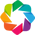

In [4]:
import geoviews as gv
import geoviews.feature as gf
gv.extension('bokeh','matplotlib')
import pandas as pd
import xarray as xr
import rasterio as rio
import rioxarray # geospatial extension for xarray
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from tqdm.auto import tqdm


download_path="/tmp/cyclobs"
os.makedirs(download_path,exist_ok = True)

In [5]:
request_url="https://cyclobs.ifremer.fr/app/api/getData?sid=al122017&instrument=C-Band_Synthetic_Aperture_Radar&include_cols=all"
df_request = pd.read_csv(request_url)

# keep 5 strongest vmax
df_request=df_request.sort_values(['vmax'],ascending=False)[0:5]


# FIXME : _gd instead of _sw by default
df_request['data_url'] = df_request['data_url'].map(lambda x : x.replace("_sw","_gd"))

# add download path
df_request['path'] = df_request['data_url'].map(lambda x : os.path.join(download_path,os.path.basename(x)))
df_request

cyclone_name                                           data_url  \
1         JOSE  https://cyclobs.ifremer.fr/static/sarwing_data...   
0         JOSE  https://cyclobs.ifremer.fr/static/sarwing_data...   

  acquisition_start_time                       instrument       mission  \
1    2017-09-08 22:02:17  C-Band Synthetic Aperture Radar  SENTINEL-1 A   
0    2017-09-06 21:15:19  C-Band Synthetic Aperture Radar    RADARSAT-2   

        sid        vmax  basin  \
1  al122017  133.333333    NaN   
0  al122017   67.708333    NaN   

                                                path  
1  /tmp/cyclobs/s1a-iw-owi-cm-20170908t220217-201...  
0  /tmp/cyclobs/rs2--owi-cm-20170906t211519-20170...

In [6]:
# download 'data_url' to 'path' with wget, and read files
projection=ccrs.Mercator()
datasets = []
for idx,entry in tqdm(df_request.iterrows(),total=df_request.shape[0]):
    ret = os.system('cd %s ; wget -N  %s' % (os.path.dirname(entry['path']),entry['data_url']))
    if ret == 0 : 
        ds = xr.open_dataset(entry['path'])
       
        datasets.append( ds.rio.reproject(projection.proj4_params))
        
    else:
        datasets.append(None) # error fetching file
df_request['dataset'] = datasets


In [7]:
df_request['dataset'].iloc[0]

<xarray.Dataset>
Dimensions:                          (time: 1, x: 420, y: 886)
Coordinates:
  * x                                (x) float64 -6.723e+06 ... -6.285e+06
  * y                                (y) float64 2.364e+06 ... 1.438e+06
  * time                             (time) datetime64[ns] 2017-09-08T22:03:19
    spatial_ref                      int64 0
Data variables:
    lon                              (time, y, x) float32 nan nan ... nan nan
    lat                              (time, y, x) float32 nan nan ... nan nan
    wind_streaks_orientation         (time, y, x) float32 nan nan ... nan nan
    incidence_angle                  (time, y, x) float32 nan nan ... nan nan
    nrcs_co                          (time, y, x) float32 nan nan ... nan nan
    mask_flag                        (time, y, x) float32 nan nan ... nan nan
    wind_speed                       (time, y, x) float32 nan nan ... nan nan
    nrcs_detrend_cr                  (time, y, x) float32 nan nan ... nan nan
    elevation_angle                  (time, y, x) float32 nan nan ... nan nan
    heterogeneity_mask               (time, y, x) float32 nan nan ... nan nan
    wind_to_direction                (time, y, x) float32 nan nan ... nan nan
    nrcs_detrend_co                  (time, y, x) float32 nan nan ... nan nan
    wind_streaks_orientation_stddev  (time, y, x) float32 nan nan ... nan nan
    nrcs_cr                          (time, y, x) float32 nan nan ... nan nan
Attributes:
    Conventions:          CF-1.6
    title:                SAR ocean surface wind field
    institution:          IFREMER/CLS
    reference:            Mouche Alexis, Chapron Bertrand, Knaff John, Zhao Y...
    measurementDate:      2017-09-08T22:03:19Z
    sourceProduct:        S1A_IW_GRDH_1SDV_20170908T220217_20170908T220242_01...
    missionName:          SENTINEL-1 A
    polarisation:         VV
    footprint:            POLYGON((-58.796684 12.911622, -56.534523 13.348675...
    l2ProcessingUtcTime:  20-Apr-2020 21:36:23.662359
    grid_mapping:         spatial_ref

In [8]:

gv_list=[gf.coastline.opts(projection=projection)]
for ds in df_request['dataset']:
    gv_list.append(gv.Image(ds['wind_speed'].squeeze()[::5,::5],crs=projection).opts(cmap='jet',tools=['hover']))
    
gv.Overlay(gv_list).options(width=800, height=500)



:Overlay
   .Coastline.I :Feature   [Longitude,Latitude]
   .Image.I     :Image   [x,y]   (wind_speed)
   .Image.II    :Image   [x,y]   (wind_speed)